## Name: Ho Man Leung
## Final Exam 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
df=pd.read_csv("C:/Users/AsusPC/Desktop/Saint Peter's University Note/DS-640 Predictive Analytics and Financial Modeling/Clothing_store_training_test")
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,flag sweaters,flag knit tops,flag knit dresses,flag blouses,flag jackets,flag career pants,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flag spending AM,flag spending PS,flag spending CC,flag spending AX,flag spending last three months,flag spending last one month,flag spending last six months,flag spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,7.0,N,0.0,5.0,0.0,0.00,31.81,111.00,10.0,0.00,0.0,368.46,184.2300,0.00,0.00,0.430964,5.909332,5.216185,0.424264,0.000000,0.000000,0.547723,0.000000,0.500000,0.000000,0.435890,0.000000,0.0,0.0,0.000000,0.141421,0.173205,0.538516,T,F,F,T,F,T,F,T,F,F,F,F,T,T,T,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,F,F,T,F,F,F,F,F,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,7.0,Y,0.0,4.0,2.0,50.00,32.72,43.50,10.0,0.03,1.0,258.00,64.5000,82.01,120.00,0.583333,5.552960,4.166665,0.509902,0.400000,0.000000,0.000000,0.000000,0.424264,0.374166,0.000000,0.424264,0.0,0.0,0.000000,0.000000,0.141421,0.608276,T,T,F,F,F,T,T,F,T,F,F,F,F,T,T,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,F,F,T,F,T,T,T,F,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,7.0,N,0.0,4.0,0.0,0.00,100.00,68.60,16.0,0.00,0.0,77.00,38.5000,0.00,0.00,0.430964,4.343805,3.650658,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,F,F,T,F,F,F,F,T,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,7.0,Y,0.0,9.0,6.0,66.67,23.27,26.96,10.0,0.00,0.0,846.06,105.7575,104.94,268.93,0.637204,6.740590,4.661078,0.616441,0.000000,0.223607,0.244949,0.447214,0.412311,0.000000,0.223607,0.000000,0.0,0.0,0.072849,0.173205,0.1000

In [10]:
#First we change the ZIP code from 4 digit to 5 digit

df['ZIP_CODE']=df['ZIP_CODE'].astype('str')

In [18]:
# As we see from above, some of the ZIP code is 4 digit as it start from zero
df['ZIP_CODE']=df['ZIP_CODE'].apply(lambda x: '0'+x if len(x) < 5 else x)

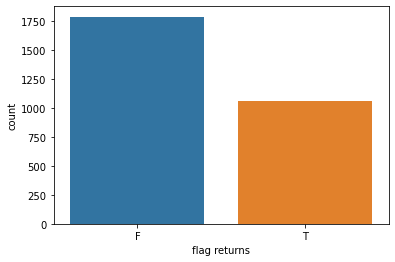

In [39]:
# number of the customer return
sns.countplot(x='flag returns',data=df)

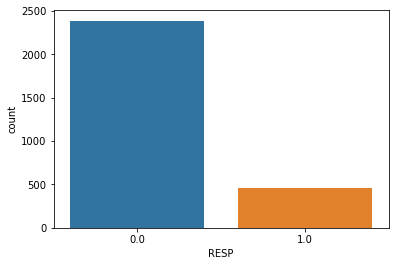

In [49]:
# number of response to promotion
sns.countplot(x='RESP',data=df)

As we got some many feature and I want to make a good use of feature to classify the customer to different group

Let me set the goal of this project is to idenify the customer characteristic to define which customer will return 

In [54]:
# these variable consist the spending of customer and you can see there are negative spending in those variables
df.loc[:,'PCOLLSPND':'SMONSPEND'].describe()

,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND
count,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2846.000000
mean,0.063320,22.454872,193.399175,261.964482,21.327425,87.062515,30.697050,224.475425
std,0.166456,182.452623,579.314984,427.983748,100.682263,187.607568,94.183199,366.718217
min,-0.390000,0.000000,-230.820000,0.010000,-65.140000,-186.730000,-273.310000,-187.000000
25%,0.000000,0.000000,0.000000,69.960000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,130.730000,0.000000,0.000000,0.000000,102.490000
75%,0.000000,0.000000,171.945000,283.975000,0.000000,108.305000,0.000000,296.805000
max,1.000000,5035.580000,17946.900000,8029.070000,2049.930000,3555.750000,1799.000000,4551.490000


In [58]:
spending_list=['PCOLLSPND','AMSPEND','PSSPEND','CCSPEND','AXSPEND','TMONSPEND','OMONSPEND','SMONSPEND']

for i in spending_list:
    df[i]=df[i].apply(lambda x: 0 if x<0 else x)

In [59]:
df.loc[:,'PCOLLSPND':'SMONSPEND'].describe()

,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND
count,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2846.000000
mean,0.063764,22.454872,193.639571,261.964482,21.354243,88.018356,31.270200,224.891086
std,0.166011,182.452623,579.211165,427.983748,100.669053,186.931316,93.599384,366.399812
min,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,69.960000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,130.730000,0.000000,0.000000,0.000000,102.490000
75%,0.000000,0.000000,171.945000,283.975000,0.000000,108.305000,0.000000,296.805000
max,1.000000,5035.580000,17946.900000,8029.070000,2049.930000,3555.750000,1799.000000,4551.490000


So I change all the negative spending to zero, as negative spending is abnormal

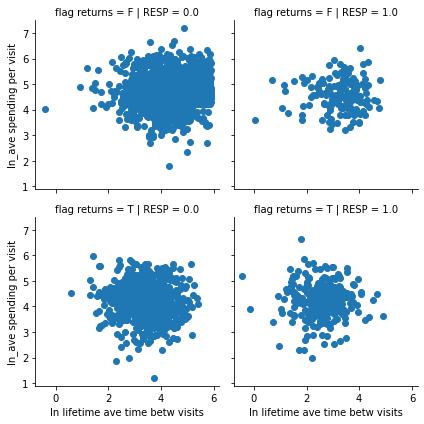

In [74]:
g=sns.FacetGrid(df,row='flag returns',col='RESP')
g.map(plt.scatter,'ln lifetime ave time betw visits','ln_ave spending per visit')

Becasue of my local computer cannot perform the pairplot with all the  numerical variables, I will perform the PCA analysis first to lower the dimension of the data 

In [75]:
from sklearn.preprocessing import StandardScaler

In [77]:
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,flag sweaters,flag knit tops,flag knit dresses,flag blouses,flag jackets,flag career pants,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flag spending AM,flag spending PS,flag spending CC,flag spending AX,flag spending last three months,flag spending last one month,flag spending last six months,flag spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,7.0,N,0.0,5.0,0.0,0.00,31.81,111.00,10.0,0.00,0.0,368.46,184.2300,0.00,0.00,0.430964,5.909332,5.216185,0.424264,0.000000,0.000000,0.547723,0.000000,0.500000,0.000000,0.435890,0.000000,0.0,0.0,0.000000,0.141421,0.173205,0.538516,T,F,F,T,F,T,F,T,F,F,F,F,T,T,T,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,F,F,T,F,F,F,F,F,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,7.0,Y,0.0,4.0,2.0,50.00,32.72,43.50,10.0,0.03,1.0,258.00,64.5000,82.01,120.00,0.583333,5.552960,4.166665,0.509902,0.400000,0.000000,0.000000,0.000000,0.424264,0.374166,0.000000,0.424264,0.0,0.0,0.000000,0.000000,0.141421,0.608276,T,T,F,F,F,T,T,F,T,F,F,F,F,T,T,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,F,F,T,F,T,T,T,F,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,7.0,N,0.0,4.0,0.0,0.00,100.00,68.60,16.0,0.00,0.0,77.00,38.5000,0.00,0.00,0.430964,4.343805,3.650658,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,F,F,T,F,F,F,F,T,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,7.0,Y,0.0,9.0,6.0,66.67,23.27,26.96,10.0,0.00,0.0,846.06,105.7575,104.94,268.93,0.637204,6.740590,4.661078,0.616441,0.000000,0.223607,0.244949,0.447214,0.412311,0.000000,0.223607,0.000000,0.0,0.0,0.072849,0.173205,0.1000

In [83]:
# exclude all categorial variable and nominal variable

df2=df.copy()
features=df2.loc[:,['bc purchase visits','ln total net sales','ln_ave spending per visit','sqrt sweaters','sqrt knit tops',
           'sqrt knit dresses','sqrt blouses','sqrt jackets','sqrt career pants','sqrt casual pants',
           'sqrt shirts','sqrt dresses','sqrt suits','sqrt outerwear','sqrt jewelry','sqrt fashion','sqrt legwear','sqrt collectibles',
          'sqrt spending AM','sqrt spending PS','sqrt spending CC','sqrt spending AX','sqrt spending last three months','sqrt spending last one month','sqrt spending last six months','sqrt spending SPLY',
          'ln days between purchases','ln # different product classes','sqrt # coupons used','ln # individual items purchased',
          'ln lifetime ave time betw visits','ln product uniformity','sqrt responded','sqrt spending months 2 3','sqrt spending months 4 5 6']]

In [84]:
features.head()

,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,sqrt spending months 2 3,sqrt spending months 4 5 6
0,0.430964,5.909332,5.216185,0.424264,0.000000,0.000000,0.547723,0.000000,0.500000,0.000000,0.435890,0.000000,0.0,0.0,0.000000,0.141421,0.173205,0.538516,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,5.808142,2.197225,1.000000,2.397895,4.709530,3.459781,0.000000,0.000000,0.000000
1,0.583333,5.552960,4.166665,0.509902,0.400000,0.000000,0.000000,0.000000,0.424264,0.374166,0.000000,0.424264,0.0,0.0,0.000000,0.000000,0.141421,0.608276,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,5.159055,1.791759,0.000000,2.639057,3.772761,3.487987,1.414214,9.055937,10.954451
2,0.430964,4.343805,3.650658,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,5.144583,0.000000,0.000000,0.693147,4.228293,4.605170,0.000000,0.000000,0.000000
3,0.637204,6.740590,4.661078,0.616441,0.000000,0.223607,0.244949,0.447214,0.412311,0.000000,0.223607,0.000000,0.0,0.0,0.072849,0.173205,0.100000,0.000000,0.0,0.0,29.087111,0.0,10.244023,0.000000,19.335718,12.893797,4.473009,2.708050,1.732051,3.555348,3.294354,3.147165,2.449490,10.244023,16.399085
4,0.000000,4.470953,4.470953,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.640312,0.000000,0.000000,0.0,0.0,0.412311,0.000000,0.000000,0.000000,0.0,0.0,9.350936,0.0,9.350936,0.000000,9.350936,0.000000,3.891820,1.386294,0.000000,2.079442,3.198673,3.350606,0.000000,9.350936,0.000000


In [86]:
Stand_scale=StandardScaler()
s_features=Stand_scale.fit_transform(features)

In [88]:
df_s_features=pd.DataFrame(s_features,columns=features.columns)

In [94]:
df_s_features.dropna(inplace=True)

Text(0, 0.5, 'cummulate explained variance')

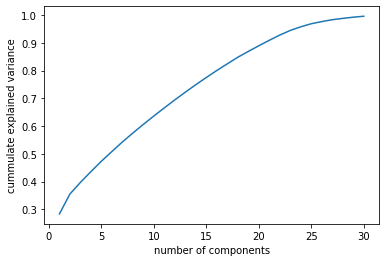

In [117]:
from sklearn.decomposition import PCA

# look at te variance explained by number of component
pca=PCA(n_components=30)
pca.fit(df_s_features)
    
plt.figure()
plt.plot(np.arange(1,31),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulate explained variance')

Base on the above graph,I will choose 20 components to perform analysis, as it already got the 90% explained variance

In [123]:
pca=PCA(n_components=20)
components=pca.fit_transform(df_s_features)
name=['components {}'.format(i) for i in range(1,21)]
pca_df=pd.DataFrame(components,columns=name)
pca_df.head()

,components 1,components 2,components 3,components 4,components 5,components 6,components 7,components 8,components 9,components 10,components 11,components 12,components 13,components 14,components 15,components 16,components 17,components 18,components 19,components 20
0,-0.954005,2.105274,1.002605,-1.791276,-0.721939,0.435864,0.173871,-0.201980,-0.262886,0.833366,-0.585587,1.162993,-1.054617,-0.541688,1.508295,-0.442239,-0.540231,1.095548,-0.502688,1.539175
1,1.083977,-0.421183,-0.754535,0.657231,-1.406915,-0.251306,0.755999,0.276882,1.206694,-1.616929,-0.823796,0.193898,1.672873,-0.983304,0.812633,0.144338,-0.927425,1.655065,0.292224,1.488330
2,-3.732327,-1.923114,0.922012,1.378514,-1.488276,-0.779461,0.912909,-0.496122,-0.304801,0.273922,-0.084992,-0.346097,-0.702627,-0.014314,-0.301195,0.538018,0.268153,-0.319085,0.650141,-0.071815
3,3.757660,0.685963,2.129004,-0.179740,-0.272325,0.300519,0.786658,0.120707,-0.586509,0.377573,-0.641516,-0.197010,-0.741778,-0.145036,0.355011,-0.020584,-0.941107,-0.690635,1.154542,-0.338726
4,-0.875417,-2.553342,-1.166028,0.572747,0.352084,1.602611,-0.075686,1.835769,1.340622,1.264422,-1.266565,-0.232232,3.104876,2.680310,-0.460235,1.056940,-1.399561,1.044616,-0.081000,-0.403038


In [124]:
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP,Tot_Spend,Sales per Visit,Spending_Month_2_3,Spending_Month_4_5_6,bc purchase visits,ln total net sales,ln_ave spending per visit,sqrt sweaters,sqrt knit tops,sqrt knit dresses,sqrt blouses,sqrt jackets,sqrt career pants,sqrt casual pants,sqrt shirts,sqrt dresses,sqrt suits,sqrt outerwear,sqrt jewelry,sqrt fashion,sqrt legwear,sqrt collectibles,flag sweaters,flag knit tops,flag knit dresses,flag blouses,flag jackets,flag career pants,flag casual pants,flag shirts,flag dresses,flag suits,flag outerwear,flag jewelry,flag fashion,flag legwear,flag collectibles,sqrt spending AM,sqrt spending PS,sqrt spending CC,sqrt spending AX,sqrt spending last three months,sqrt spending last one month,sqrt spending last six months,sqrt spending SPLY,flag spending AM,flag spending PS,flag spending CC,flag spending AX,flag spending last three months,flag spending last one month,flag spending last six months,flag spending SPLY,ln days between purchases,ln # different product classes,sqrt # coupons used,ln # individual items purchased,ln stores,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17.0,666.0,333.00,0.08,9.0,1.0,11.0,1.0,7.0,N,0.0,5.0,0.0,0.00,31.81,111.00,10.0,0.00,0.0,368.46,184.2300,0.00,0.00,0.430964,5.909332,5.216185,0.424264,0.000000,0.000000,0.547723,0.000000,0.500000,0.000000,0.435890,0.000000,0.0,0.0,0.000000,0.141421,0.173205,0.538516,T,F,F,T,F,T,F,T,F,F,F,F,T,T,T,0.0,0.0,19.195312,0.0,0.000000,0.000000,0.000000,0.000000,F,F,T,F,F,F,F,F,5.808142,2.197225,1.000000,2.397895,0.0,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14.0,696.0,174.00,0.33,6.0,0.0,14.0,1.0,7.0,Y,0.0,4.0,2.0,50.00,32.72,43.50,10.0,0.03,1.0,258.00,64.5000,82.01,120.00,0.583333,5.552960,4.166665,0.509902,0.400000,0.000000,0.000000,0.000000,0.424264,0.374166,0.000000,0.424264,0.0,0.0,0.000000,0.000000,0.141421,0.608276,T,T,F,F,F,T,T,F,T,F,F,F,F,T,T,0.0,0.0,16.062378,0.0,11.747340,7.482647,16.062378,0.000000,F,F,T,F,T,T,T,F,5.159055,1.791759,0.000000,2.639057,0.0,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10.0,343.0,171.50,0.11,1.0,0.0,2.0,1.0,7.0,N,0.0,4.0,0.0,0.00,100.00,68.60,16.0,0.00,0.0,77.00,38.5000,0.00,0.00,0.430964,4.343805,3.650658,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,0.0,0.0,8.774964,0.0,0.000000,0.000000,0.000000,6.244998,F,F,T,F,F,F,F,T,5.144583,0.000000,0.000000,0.693147,0.0,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24.0,701.0,87.62,0.29,15.0,3.0,35.0,1.0,7.0,Y,0.0,9.0,6.0,66.67,23.27,26.96,10.0,0.00,0.0,846.06,105.7575,104.94,268.93,0.637204,6.740590,4.661078,0.616441,0.000000,0.223607,0.244949,0.447214,0.412311,0.000000,0.223607,0.000000,0.0,0.0,0.072849,0.173205,0.1000

In [125]:
flag=df.loc[:,['flag sweaters','flag knit tops','flag knit dresses','flag blouses','flag jackets','flag career pants',
               'flag casual pants','flag shirts','flag dresses','flag suits','flag outerwear','flag jewelry','flag fashion',
               'flag legwear','flag collectibles','flag spending AM','flag spending PS','flag spending CC','flag spending AX',
               'flag spending last three months','flag spending last one month','flag spending last six months',
               'flag spending SPLY','flag returns','flag response rate','flag markdown']]

In [126]:
scale_flag=pd.get_dummies(flag,drop_first=True)

In [127]:
scale_flag.head()

,flag sweaters_T,flag knit tops_T,flag knit dresses_T,flag blouses_T,flag jackets_T,flag career pants_T,flag casual pants_T,flag shirts_T,flag dresses_T,flag suits_T,flag outerwear_T,flag jewelry_T,flag fashion_T,flag legwear_T,flag collectibles_T,flag spending AM_T,flag spending PS_T,flag spending AX_T,flag spending last three months_T,flag spending last one month_T,flag spending last six months_T,flag spending SPLY_T,flag returns_T,flag response rate_T,flag markdown_T
0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,1
4,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1


In [143]:
final_features=pd.concat([pca_df,scale_flag],axis=1)

In [144]:
final_features.head()

,components 1,components 2,components 3,components 4,components 5,components 6,components 7,components 8,components 9,components 10,components 11,components 12,components 13,components 14,components 15,components 16,components 17,components 18,components 19,components 20,flag sweaters_T,flag knit tops_T,flag knit dresses_T,flag blouses_T,flag jackets_T,flag career pants_T,flag casual pants_T,flag shirts_T,flag dresses_T,flag suits_T,flag outerwear_T,flag jewelry_T,flag fashion_T,flag legwear_T,flag collectibles_T,flag spending AM_T,flag spending PS_T,flag spending AX_T,flag spending last three months_T,flag spending last one month_T,flag spending last six months_T,flag spending SPLY_T,flag returns_T,flag response rate_T,flag markdown_T
0,-0.954005,2.105274,1.002605,-1.791276,-0.721939,0.435864,0.173871,-0.201980,-0.262886,0.833366,-0.585587,1.162993,-1.054617,-0.541688,1.508295,-0.442239,-0.540231,1.095548,-0.502688,1.539175,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,1.083977,-0.421183,-0.754535,0.657231,-1.406915,-0.251306,0.755999,0.276882,1.206694,-1.616929,-0.823796,0.193898,1.672873,-0.983304,0.812633,0.144338,-0.927425,1.655065,0.292224,1.488330,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1
2,-3.732327,-1.923114,0.922012,1.378514,-1.488276,-0.779461,0.912909,-0.496122,-0.304801,0.273922,-0.084992,-0.346097,-0.702627,-0.014314,-0.301195,0.538018,0.268153,-0.319085,0.650141,-0.071815,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,3.757660,0.685963,2.129004,-0.179740,-0.272325,0.300519,0.786658,0.120707,-0.586509,0.377573,-0.641516,-0.197010,-0.741778,-0.145036,0.355011,-0.020584,-0.941107,-0.690635,1.154542,-0.338726,1,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,1
4,-0.875417,-2.553342,-1.166028,0.572747,0.352084,1.602611,-0.075686,1.835769,1.340622,1.264422,-1.266565,-0.232232,3.104876,2.680310,-0.460235,1.056940,-1.399561,1.044616,-0.081000,-0.403038,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1


In [145]:
# depentent variable
target=df.loc[:,'RESP']

So we are ready with the features, let use logistic regression to perform the analysis

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_features, target, test_size=0.25, random_state=42)

In [162]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [166]:
# model performace 
model.score(x_test,y_test)

0.824438202247191

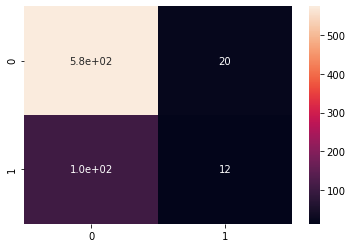

In [170]:
from sklearn.metrics import confusion_matrix,classification_report

con=confusion_matrix(y_test,prediction)
sns.heatmap(con,annot=True)

In [172]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       595
         1.0       0.38      0.10      0.16       117

    accuracy                           0.82       712
   macro avg       0.61      0.53      0.53       712
weighted avg       0.77      0.82      0.78       712



As you can see from the above table, the F1 score for class 0 is 90%, it pretty good but for class 1 is not good enough, it may be the sample problem or imbalance data, as we just got 2000 records

In this project, we got some many feature and it take a lot of time to understand the feature as many feature are transform base on the orginial features
Also I want to try another method, for example the clustering method and neural  network, to classify customer into cluster but for the time limitation I can only complete the logistic regression